In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import time
%matplotlib inline

## Increase size of jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [461]:
# Get directories
notebooks_dir = os.path.abspath(os.path.dirname('__file__'))
base_dir = os.path.dirname(os.path.join(notebooks_dir))
data_dir = os.path.join(base_dir,'data')
raw_data_dir =  os.path.join(data_dir,'raw')

In [462]:
# import custom utilities
sys.path.append(os.path.join(base_dir,'utils'))
from utils import ecdf

In [463]:
# Import the raw data
raw_data = os.path.join(raw_data_dir,'loan_tape.csv')
raw_df = pd.read_csv(raw_data,index_col=0)
raw_df.set_index('id', inplace = True)

## First I'd like to better undertand what the data looks like, what data may be missing, and what could be cleaned.
### I'll look at
<UL><LI>Shape of the data frame</LI><LI>Look at a sampling of the data in the data frame</LI><LI>Look at data counts for each category to see if we are missing any data</LI></UL>

In [464]:
raw_df.shape

(302866, 29)

In [465]:
raw_df.head().T

id,b1c2c1027a80cf96612e94b17ca6cf97,6f0fa11f0cd94e8c4b08fa60cf7a9784,8e19d4254653f2da889669d1b4f72214,5e7c6fe5992c0335c9ed67a9b78d2db5,cf17ce55016ff72fe9c30286c502f46b
user_id,871d568bad72ff8e9ef2bfe227bccac1,f273f1ce0b770de2e4a4bc853c9c77e1,b265ca31b3cba20036699653814d4abc,2bce2b1907287fa7bebf562213e315b8,f2aefc7c5d07f790d59dadf8742eb32b
amount,170,110,160,90,100
signup_source,IOS,IOS,ANDROID,ANDROID,ANDROID
location_state,FL,TX,CA,KY,PA
negbalancerate,0.977654,0.28022,0.021978,0.716981,0.899441
brigitloansrepaid,0,0,2,0,2
highestpayfrequency,BIWEEKLY,BIWEEKLY,BIWEEKLY,BIWEEKLY,WEEKLY
accthistorydays,182,183,183,105,182
noactivityrate,0.726257,0.494505,0.313187,0.481132,0.530726
recurringrate,0.0112132,0,0.0312417,0.00439842,0.0594508


## Look at all data

In [466]:
raw_df.describe(percentiles=[.01,.1,.25,.50,.75,.9,.99],include='all').T.sort_values('unique')

,count,unique,top,freq,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
signup_source,293359,4,IOS,201558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
highestpayfrequency,269202,6,BIWEEKLY,166802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_state,292903,51,TX,61279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,302866,94009,a4ed2a0289e2f14776b6a35dae617a89,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,302866,NaN,NaN,NaN,128.282,40.7961,1,80,90,100,110,150,200,250,250
negbalancerate,302866,NaN,NaN,NaN,0.226933,0.260669,0,0,0.00549451,0.032967,0.116667,0.333333,0.687151,0.944444,1
brigitloansrepaid,302866,NaN,NaN,NaN,2.61795,3.18159,0,0,0,0,2,4,7,14,34
accthistorydays,302866,NaN,NaN,NaN,168.346,31.4189,14,50,118,178,181,183,184,184,184
noactivityrate,302866,NaN,NaN,NaN,0.389882,0.0980432,0,0.0709517,0.316667,0.344444,0.384615,0.43956,0.494444,0.666667,0.95935
recurringrate,302866,NaN,NaN,NaN,0.037177,0.0695862,0,0,0,0,0.00821138,0.0396986,0.10957,0.345332,0.981751


In [467]:
numerical_columns = ['amount', 'negbalancerate', 'brigitloansrepaid',
       'accthistorydays', 'noactivityrate', 'recurringrate', 'debitcountz',
       'debitamountz', 'dayswithbrigit', 'balance', 'balancemean',
       'dailydebitcountmean', 'credittodebitratiomean',
       'highestpaydepositvoladj', 'dailyincomemean', 'recurrentcount',
       'negbaleventcount', 'dailydebitcountsd', 'daystopayday',
       'monthswithfeesrate', 'balancemeanafterpayday0',
       'balancemeanafterpayday1', 'recurrentamountsum', 'highestpaymonthage','default_flag']

<a name="Cleanup"></a>
# Data Cleaning

## Check for missing data

In [468]:
raw_df.describe(
    percentiles=[.01,.1,.25,.50,.75,.9,.99],include='all'
).T.loc[
    raw_df.describe(percentiles=[],include='all').T.sort_values('unique')['count'] < np.count_nonzero(raw_df.index)
]

,count,unique,top,freq,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
signup_source,293359,4,IOS,201558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_state,292903,51,TX,61279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
highestpayfrequency,269202,6,BIWEEKLY,166802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
debitcountz,302864,NaN,NaN,NaN,0.105953,0.205291,-1.07773,-0.346225,-0.132571,-0.0257258,0.0912677,0.22174,0.361634,0.691247,1.61182
debitamountz,302864,NaN,NaN,NaN,0.110182,0.16609,-0.630498,-0.197022,-0.0731531,-0.00172242,0.0864562,0.195219,0.327887,0.619294,1.39728
credittodebitratiomean,302849,NaN,NaN,NaN,-1.87859,91.4781,-25813.6,-3.75994,-1.24135,-1.07923,-1.01691,-0.980974,-0.91236,-0.78652,0
daystopayday,302821,NaN,NaN,NaN,8.84327,4.85965,0,0,2,5,9,13,13,26,42
monthswithfeesrate,302859,NaN,NaN,NaN,0.312482,0.321801,0,0,0,0,0.2,0.5,0.833333,1,1


### It seems we have 94,009 unique users that have gone between 1 and 22 loan originations.
In categorical data, we're missing about 3% of location states & signup sources. We're missing about 12% of highest pay frequencies. The fact that a customer is not willing to give us their highest pay frequency may be an indicator in ability to repay itself. These may be a little difficult to fill missing data. 

For our numerical data, we are missing a very small amount of information scattered throughout and can probably impute with a mean, median, or some other statistical function.

<a name="CleanupLocation"></a>
### if a location is missing, is the user missing this location across all loans? If not, fill in from previous value

In [469]:

users_with_no_location = raw_df[raw_df['location_state'].isnull()]['user_id'].unique()
print(f"Unique location states among users who have at least 1 nan state: {raw_df[raw_df.user_id.isin(users_with_no_location)]['location_state'].unique()}")

print(f"Are these customer's one and done (>1 means at least one user has multiple loans)? {raw_df[raw_df.user_id.isin(users_with_no_location)]['user_id'].value_counts().head(1).values}")

Unique location states among users who have at least 1 nan state: [nan]
Are these customer's one and done (>1 means at least one user has multiple loans)? [21]


#### Since a user is missing location data across all loans, we can not fill based off their past data. We could either code them as unknown (which may provide value) or code them as the most common states.


## PIVOTAL STEP: Fill location state data with unknown

In [470]:
raw_df['location_state'] = raw_df['location_state'].fillna('Unknown')

<a name="CleanupSignupSource"></a>
### if a signup_source is missing, is the user missing this signup_source across all loans? If not, fill in from previous value

In [471]:

users_with_no_signup_source = raw_df[raw_df['signup_source'].isnull()]['user_id'].unique()
print(f"Unique signup_source among users who have at least 1 nan state: {raw_df[raw_df.user_id.isin(users_with_no_location)]['signup_source'].unique()}")

print(f"Are these customer's one and done (>1 means at least one user has multiple loans)? {raw_df[raw_df.user_id.isin(users_with_no_location)]['user_id'].value_counts().head(1).values}")

Unique signup_source among users who have at least 1 nan state: [nan 'IOS' 'MOBILE' 'ANDROID']
Are these customer's one and done (>1 means at least one user has multiple loans)? [21]


#### Since a user is missing signup_source data across all loans, we can not fill based off their past data. We could either code them as unknown (which may provide value) or code them as the most signup_source.


## PIVOTAL STEP: Fill signup_source data with unknown

In [472]:
raw_df['signup_source'] = raw_df['signup_source'].fillna('Unknown')

<a name="CleanupPayFrequency"></a>
### if a highestpayfrequency is missing, is the user missing this highestpayfrequency across all loans? If not, fill in from previous value

In [473]:
users_with_no_location = raw_df[raw_df['highestpayfrequency'].isnull()]['user_id'].unique()
raw_df[raw_df.user_id.isin(users_with_no_location)]['highestpayfrequency'].unique()

array(['BIWEEKLY', 'WEEKLY', nan, 'SEMIMONTHLY', 'MONTHLY_WEEKDAY',
       'MONTHLY', 'IRREGULAR'], dtype=object)

#### Some users who are missing highestpayfrequency on some loans also have it on others. Let's see if customers can have different pay frequencies. If not, fill from their other frequency.

In [474]:
users_missing_freq = raw_df[raw_df.user_id.isin(users_with_no_location)].sort_values(['user_id','dayswithbrigit']).copy()
users_missing_freq_piv = users_missing_freq.dropna().reset_index().pivot_table('id','user_id','highestpayfrequency',aggfunc='count').count(axis=1).sort_values(ascending=False)
users_missing_freq_piv.head(10)

user_id
202d8fe5bd1ee99a410241659b41b117    4
d1cca999cbaff79ca5e6141514d418e1    4
07b9de9aef171b3a7292c4cddaff3bf7    3
48850cdac6f9e6734aec685ca7bcf694    3
ca019b895f771c77d7d16191633393ce    3
08155700a4feb45b6410da0a6e61fe11    3
1653cd2d2e8015613149cc2abf01cd60    3
5823de6e5b78b34a3efceaa053df21e8    3
951e77479ecb4e9791f9c97c275d2cc7    3
e2ab13c572bbab9ea999112883c7bba8    3
dtype: int64

In [475]:
# Users with multiple frequencies 
print('{:0.2f}% of users with missing pay frequencies have multiple pay frequencies'.format((users_missing_freq_piv[users_missing_freq_piv>1].count()/users_missing_freq_piv.count())*100))

print('\nlets investigate a couple user')

7.49% of users with missing pay frequencies have multiple pay frequencies

lets investigate a couple user


In [476]:
print('User 1 pay frequency check')
users_missing_freq[users_missing_freq['user_id']=='d1cca999cbaff79ca5e6141514d418e1']

User 1 pay frequency check


,user_id,amount,signup_source,location_state,negbalancerate,brigitloansrepaid,highestpayfrequency,accthistorydays,noactivityrate,recurringrate,...,recurrentcount,negbaleventcount,dailydebitcountsd,daystopayday,monthswithfeesrate,balancemeanafterpayday0,balancemeanafterpayday1,recurrentamountsum,highestpaymonthage,default_flag
id,,,,,,,,,,,,,,,,,,,,,
7172805b7757d59a30b6b7cdf3ccb8f7,d1cca999cbaff79ca5e6141514d418e1,100.0,ANDROID,OH,0.005495,0,NaN,184,0.373626,0.274383,...,1,1,5.443982,2.0,1.000000,1425.579167,691.605000,1400.666667,5,0
d4c92c5be575f377c427793df462a01a,d1cca999cbaff79ca5e6141514d418e1,100.0,ANDROID,OH,0.011111,1,NaN,182,0.372222,0.265557,...,1,2,5.638420,6.0,1.000000,1534.878333,610.206667,1462.333333,5,0
29314dedcaab4f93a93a696ee9d752bd,d1cca999cbaff79ca5e6141514d418e1,100.0,ANDROID,OH,0.161111,2,NaN,179,0.366667,0.252305,...,1,9,5.723030,9.0,1.000000,1239.583333,387.370909,1462.333333,5,0
076cce0134edfe60bde7667a2e4d1e24,d1cca999cbaff79ca5e6141514d418e1,100.0,ANDROID,OH,0.177778,3,BIWEEKLY,179,0.366667,0.240815,...,1,10,5.798285,12.0,0.833333,1158.750000,327.121818,1462.333333,5,0
a128f870b57c01c2fa8955335b5664e9,d1cca999cbaff79ca5e6141514d418e1,100.0,ANDROID,OH,0.016484,4,BIWEEKLY,182,0.379121,0.000921,...,1,3,6.030907,4.0,1.000000,1469.073333,563.227500,5.360000,5,0
239e707a7b7bf9f96b9fb9d441166652,d1cca999cbaff79ca5e6141514d418e1,100.0,ANDROID,OH,0.022222,5,BIWEEKLY,183,0.372222,0.000919,...,1,4,6.038083,6.0,1.000000,1469.073333,563.227500,5.360000,5,0
2d17256e2bbc785d93970c4ae1c679d8,d1cca999cbaff79ca5e6141514d418e1,100.0,ANDROID,OH,0.383333,6,WEEKLY,182,0.377778,0.000883,...,1,19,6.094688,5.0,0.833333,254.506667,256.440000,5.360000,0,0
d957679d6ed61e8322ff9497ad58bd6e,d1cca999cbaff79ca5e6141514d418e1,100.0,ANDROID,OH,0.755556,7,IRREGULAR,182,0.377778,0.079846,...,3,11,6.150492,5.0,1.000000,270.974286,88.341429,514.940000,5,0
3e177b13f79ef24193b4c205530a3b1b,d1cca999cbaff79ca5e6141514d418e1,100.0,ANDROID,OH,0.217877,8,BIWEEKLY,179,0.379888,0.076798,...,3,12,6.137611,4.0,0.833333,698.470000,252.890000,514.940000,1,0


In [477]:
print('User 2 pay frequency check')
users_missing_freq[users_missing_freq['user_id']=='7f948c0a42fdf824757f391c033eaed4']

User 2 pay frequency check


,user_id,amount,signup_source,location_state,negbalancerate,brigitloansrepaid,highestpayfrequency,accthistorydays,noactivityrate,recurringrate,...,recurrentcount,negbaleventcount,dailydebitcountsd,daystopayday,monthswithfeesrate,balancemeanafterpayday0,balancemeanafterpayday1,recurrentamountsum,highestpaymonthage,default_flag
id,,,,,,,,,,,,,,,,,,,,,
1bf01f3251f1f749dba069cac65b87ff,7f948c0a42fdf824757f391c033eaed4,100.0,IOS,TX,0.027778,0,NaN,179,0.316667,0.052731,...,6,1,7.833959,5.0,0.166667,1092.120000,520.890000,387.456667,1,0
5a7473c50b3e26899ae66b05883d8480,7f948c0a42fdf824757f391c033eaed4,100.0,IOS,TX,0.043956,1,MONTHLY,183,0.329670,0.055956,...,6,1,7.880051,15.0,0.166667,1437.564000,1242.896000,387.456667,1,0
4ded206cd23745daf289d58f8d945a27,7f948c0a42fdf824757f391c033eaed4,100.0,IOS,TX,0.027778,2,MONTHLY,183,0.311111,0.034181,...,4,2,7.780770,5.0,0.166667,1275.071667,1087.643333,237.036667,1,0
9119d6694635a55c0c7450ba8b391d55,7f948c0a42fdf824757f391c033eaed4,100.0,IOS,TX,0.000000,3,MONTHLY,184,0.311111,0.035155,...,4,0,7.680822,7.0,0.166667,1331.071429,1136.024286,237.036667,2,0
babcb62a1fe539266a6f2ef0f5fd900f,7f948c0a42fdf824757f391c033eaed4,100.0,IOS,TX,0.461111,4,MONTHLY,183,0.316667,0.035129,...,4,20,7.720610,13.0,0.166667,723.462500,462.930000,237.036667,2,0
c027ef6052c9342d8427dec0916bc5d6,7f948c0a42fdf824757f391c033eaed4,100.0,IOS,TX,0.000000,5,MONTHLY,182,0.325967,0.034520,...,4,0,7.788030,3.0,0.166667,1331.032500,1070.500000,237.516667,2,0
a0fe2e5f603f6086516b4af740a70b31,7f948c0a42fdf824757f391c033eaed4,100.0,IOS,TX,0.000000,6,MONTHLY,183,0.329670,0.066825,...,6,0,7.993700,5.0,0.166667,1331.032500,1070.500000,461.176667,3,0
a37f69c721c227f717d3bcb8fb6efc01,7f948c0a42fdf824757f391c033eaed4,100.0,IOS,TX,0.000000,7,SEMIMONTHLY,183,0.329670,0.065002,...,6,0,7.971751,10.0,0.166667,1000.208889,544.115556,461.176667,4,0
3af1dd07527f57fb57dabfe55ca5a359,7f948c0a42fdf824757f391c033eaed4,140.0,IOS,TX,0.266667,8,IRREGULAR,179,0.316667,0.084915,...,9,15,7.888915,6.0,0.166667,1023.900000,584.535000,604.643333,1,0


In [478]:
print('User 3 pay frequency check')
users_missing_freq[users_missing_freq['user_id']=='cd13e8f78657855fc0f236eaa7ef04f1']

User 3 pay frequency check


,user_id,amount,signup_source,location_state,negbalancerate,brigitloansrepaid,highestpayfrequency,accthistorydays,noactivityrate,recurringrate,...,recurrentcount,negbaleventcount,dailydebitcountsd,daystopayday,monthswithfeesrate,balancemeanafterpayday0,balancemeanafterpayday1,recurrentamountsum,highestpaymonthage,default_flag
id,,,,,,,,,,,,,,,,,,,,,
e2cfe582e99286b42d60604c1e2cb044,cd13e8f78657855fc0f236eaa7ef04f1,130.0,ANDROID,CA,0.000000,0,NaN,145,0.472603,0.000000,...,0,0,4.037431,7.0,0.0,1068.807778,598.971111,0.000000,4,0
70b85a354d6c4fccbac8adce64b8ed82,cd13e8f78657855fc0f236eaa7ef04f1,130.0,ANDROID,CA,0.000000,1,NaN,153,0.467532,0.000000,...,0,0,3.961769,15.0,0.0,1072.609000,638.535000,0.000000,4,0
dcf93a6723736334f3879dffa1150854,cd13e8f78657855fc0f236eaa7ef04f1,130.0,ANDROID,CA,0.000000,2,NaN,169,0.452941,0.004645,...,1,0,4.023755,13.0,0.0,1086.433636,597.095455,10.990000,5,0
b08fb1afb62baa4b66f4c5494704247f,cd13e8f78657855fc0f236eaa7ef04f1,130.0,ANDROID,CA,0.005618,3,SEMIMONTHLY,177,0.421348,0.004348,...,1,1,4.095884,14.0,0.0,1004.180000,622.589167,10.990000,5,0
b7ba069c6cb703eb99518be5716c0c52,cd13e8f78657855fc0f236eaa7ef04f1,130.0,ANDROID,CA,0.005525,4,SEMIMONTHLY,182,0.419890,0.004154,...,1,1,4.055311,10.0,0.0,1022.450833,592.397500,10.990000,5,0
449b7eaf6e0dc5ad2e8381e242c95fcd,cd13e8f78657855fc0f236eaa7ef04f1,130.0,ANDROID,CA,0.694444,5,SEMIMONTHLY,183,0.416667,0.004263,...,1,14,4.020474,17.0,0.0,826.995833,432.128182,10.990000,6,0
0b615ba8077951e3dedfdcb573d3bf28,cd13e8f78657855fc0f236eaa7ef04f1,130.0,ANDROID,CA,0.005495,6,SEMIMONTHLY,183,0.434066,0.034401,...,2,1,3.774875,14.0,0.0,998.885000,511.620833,90.990000,5,0
1a36d2dbc8606fbf3b195b3feb5c3864,cd13e8f78657855fc0f236eaa7ef04f1,120.0,ANDROID,CA,0.592179,7,MONTHLY,182,0.458101,0.035074,...,2,15,3.976841,22.0,0.0,884.074167,494.944167,90.990000,5,0
1ed13e305b7762c071b80eb41d3db880,cd13e8f78657855fc0f236eaa7ef04f1,120.0,ANDROID,CA,0.005525,8,BIWEEKLY,180,0.441989,0.025663,...,2,1,3.979768,5.0,0.0,4778.935000,4622.445000,91.656667,0,1


In [479]:
# Backfill highest pay frequency
users_missing_freq['filled_pay_freq'] = users_missing_freq.groupby('user_id')['highestpayfrequency'].fillna(method = 'bfill')

In [480]:
# How many users are still missing data, and are all their loans missing data?
users_missing_freq.groupby('user_id')['filled_pay_freq'].count().divide(users_missing_freq.reset_index().groupby('user_id')['id'].count()).value_counts()

1.000000    14759
0.000000     4330
0.500000        5
0.833333        3
0.750000        2
0.666667        1
0.900000        1
0.600000        1
0.571429        1
dtype: int64

#### We still have 14 users that have pay frequency missing.
Since it's such a small amount, I'll just ffill the rest.

In [481]:
# ForwardFill highest pay frequency
users_missing_freq['filled_pay_freq'] = users_missing_freq.groupby('user_id')['filled_pay_freq'].fillna(method = 'Ffill')

In [482]:
# How many users are still missing data, and are all their loans missing data?
users_missing_freq.groupby('user_id')['filled_pay_freq'].count().divide(users_missing_freq.reset_index().groupby('user_id')['id'].count()).value_counts()

1.0    14773
0.0     4330
dtype: int64

#### We now have users that either have pay frequency for all their loan originations or no pay frequency for all loan originations. I'll fill the rest with an "Unknown"
## Pivotal Step: filling pay frequencies

In [483]:
raw_df['highestpayfrequency'] = raw_df.groupby('user_id')['highestpayfrequency'].fillna(method = 'bfill')
raw_df['highestpayfrequency'] = raw_df.groupby('user_id')['highestpayfrequency'].fillna(method = 'Ffill')
raw_df['highestpayfrequency'] = raw_df.groupby('user_id')['highestpayfrequency'].fillna('Unknown')

## Now let's check our data again for missing info

In [484]:
raw_df.describe(percentiles=[],include='all').T.loc[raw_df.describe(percentiles=[],include='all').T.sort_values('unique')['count']< np.count_nonzero(raw_df.index)]

,count,unique,top,freq,mean,std,min,50%,max
debitcountz,302864,NaN,NaN,NaN,0.105953,0.205291,-1.07773,0.0912677,1.61182
debitamountz,302864,NaN,NaN,NaN,0.110182,0.16609,-0.630498,0.0864562,1.39728
credittodebitratiomean,302849,NaN,NaN,NaN,-1.87859,91.4781,-25813.6,-1.01691,0
daystopayday,302821,NaN,NaN,NaN,8.84327,4.85965,0,9,42
monthswithfeesrate,302859,NaN,NaN,NaN,0.312482,0.321801,0,0.2,1


### Looking to fill in missing data on debitcountz and debitamountz, I'll look at the two records missing info

In [485]:
raw_df[raw_df.debitcountz.isna()].T

id,fe79e7d6b15bdd5e5c5770a13474756e,1ccb4f31197910a5d91e1dc9364bb6cf
user_id,6aab9ddbc679b3fc9f27ea0e5e930b5a,859b4bf60c7a4d8120456aba4fd7a62a
amount,100,100
signup_source,IOS,Unknown
location_state,CA,Unknown
negbalancerate,0,0
brigitloansrepaid,0,0
highestpayfrequency,Unknown,Unknown
accthistorydays,153,154
noactivityrate,0.956522,0.95935
recurringrate,0,0


### These two records are missing most of the data. I want to see if there are others that are missing most of the data. If not, i'll drop these two records. If so, We'll impute that NAN with median values.

In [486]:
from sklearn.metrics.pairwise import cosine_similarity

In [487]:
loan_mtx = raw_df[numerical_columns]
loan_mtx['debitcountz'] = loan_mtx['debitcountz'].fillna(-100000)# Fill with large number to be sure only the 0's dont get mixed into the other loans
loan_mtx = loan_mtx.fillna(0)
loan_similiarity = cosine_similarity(loan_mtx.loc['1ccb4f31197910a5d91e1dc9364bb6cf'].values.reshape(1,-1),loan_mtx)

C:\Users\richard\.conda\envs\brigit\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [488]:
loan_mtx.iloc[loan_similiarity[0].argsort()[::-1][:5]].T

id,1ccb4f31197910a5d91e1dc9364bb6cf,fe79e7d6b15bdd5e5c5770a13474756e,e4b452102013b0f1f45f5213e7a85723,a30ffaf3f9ca680ddec3ef154168188f,c4b76471e9d31846b73eb8bb7fe6c8da
amount,100.000000,100.000000,200.000000,100.000000,100.000000
negbalancerate,0.000000,0.000000,0.165746,0.076923,0.000000
brigitloansrepaid,0.000000,0.000000,0.000000,2.000000,8.000000
accthistorydays,154.000000,153.000000,180.000000,182.000000,183.000000
noactivityrate,0.959350,0.956522,0.309392,0.368132,0.335165
recurringrate,0.000000,0.000000,0.003494,0.004448,0.089043
debitcountz,-100000.000000,-100000.000000,0.041039,-0.092311,-0.158333
debitamountz,0.000000,0.000000,-0.111036,0.194670,-0.166556
dayswithbrigit,0.000000,149.000000,0.000000,57.000000,175.000000
balance,668.910000,205.090000,730.300000,242.820000,377.980000


### These first two loans are very similar to each other while the next three cloesest loans have a good bunch more data filled in. I'll drop these two loans as they are probably outliers

### Next, let's see how many other loans may be missing data.

In [489]:
# Find the ids with the highest amount of missing data
drop_columns_that_are_auto_populated = ['user_id','default_flag','amount']
numerator = ((raw_df==0) | (raw_df=='Unknown') | (raw_df.isna())).sum(axis=1)
denominator = raw_df.drop(drop_columns_that_are_auto_populated,axis=1).fillna(0).count(axis=1)
pct_missing = numerator.divide(denominator).sort_values(ascending=False)
pct_missing[:10]

C:\Users\richard\.conda\envs\brigit\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


id
1ccb4f31197910a5d91e1dc9364bb6cf    0.884615
fe79e7d6b15bdd5e5c5770a13474756e    0.769231
5b21116a95b4b0727fe98d6d6fd25060    0.615385
f1e422aa8466523b8b72db38b84efc0e    0.538462
55cebc15a72f74d3f855062c00725972    0.500000
9ad3e21826f5877124250271b54d6d35    0.500000
cc716c9f52e24de138b13d0049fb8c9b    0.500000
990f6ba47dcc61d789d4b8c3ee7f89a3    0.500000
c55842965efff51757f219b7460626ca    0.500000
c61bc6ce803d5050167fd11c194cdfa9    0.500000
dtype: float64

### Very few are missing more than 50 percent. For loans missing more than 50%, I'll impute 0 across the board to simulate the customer not entering enough information.
## Pivotal Step: Imputing missing values for loans with > 50% data missing

In [490]:
drop_columns_that_are_auto_populated = ['user_id','default_flag','amount']
numerator = ((raw_df==0) | (raw_df=='Unknown') | (raw_df.isna())).sum(axis=1)
denominator = raw_df.drop(drop_columns_that_are_auto_populated,axis=1).fillna(0).count(axis=1)
pct_missing = numerator.divide(denominator).sort_values(ascending=False)

raw_df.loc[pct_missing > .5] = raw_df.loc[pct_missing > .5].fillna(0)

### Check for missing info one more time

In [491]:
raw_df.describe(percentiles=[],include='all').T.loc[raw_df.describe(percentiles=[],include='all').T.sort_values('unique')['count']< np.count_nonzero(raw_df.index)]

,count,unique,top,freq,mean,std,min,50%,max
credittodebitratiomean,302851,NaN,NaN,NaN,-1.87857,91.4778,-25813.6,-1.01691,0
daystopayday,302824,NaN,NaN,NaN,8.84319,4.8597,0,9,42
monthswithfeesrate,302859,NaN,NaN,NaN,0.312482,0.321801,0,0.2,1


### To impute the rest of these values, I'll take the mean value of each column by user. If there is no mean, then take the mean of the whole data set.

In [492]:
raw_df['credittodebitratiomean'] = raw_df.groupby('user_id')['credittodebitratiomean'].transform(lambda x: x.fillna(x.mean()))
raw_df['credittodebitratiomean'] = raw_df['credittodebitratiomean'].fillna(raw_df['credittodebitratiomean'].mean())

raw_df['daystopayday'] = raw_df.groupby('user_id')['daystopayday'].transform(lambda x: x.fillna(x.mean()))
raw_df['daystopayday'] = raw_df['daystopayday'].fillna(raw_df['daystopayday'].mean())

raw_df['monthswithfeesrate'] = raw_df.groupby('user_id')['monthswithfeesrate'].transform(lambda x: x.fillna(x.mean()))
raw_df['monthswithfeesrate'] = raw_df['monthswithfeesrate'].fillna(raw_df['monthswithfeesrate'].mean())

In [493]:
raw_df[~(raw_df.debitcountz.isna())].shape

(302866, 29)

<a name="featureCorrelations"></a>
# Take a look at the data and any correlations we may have

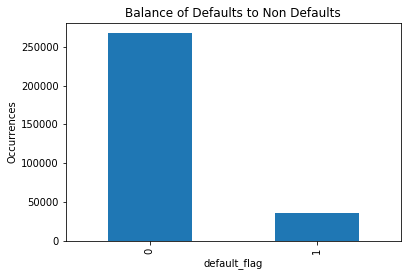

In [494]:
## Whats the balance of default / no default?

raw_df.reset_index().groupby('default_flag')['id'].count().plot(kind='bar')
plt.title('Balance of Defaults to Non Defaults')
plt.ylabel('Occurrences');

In [495]:
raw_df.reset_index().groupby('default_flag')['id'].count()/raw_df.reset_index().groupby('default_flag')['id'].count().sum()

default_flag
0    0.882463
1    0.117537
Name: id, dtype: float64

### There is an imbalance issue in our target data that we will have to address to even out the model.

### Next let's see if there is any multicollinearity in the features

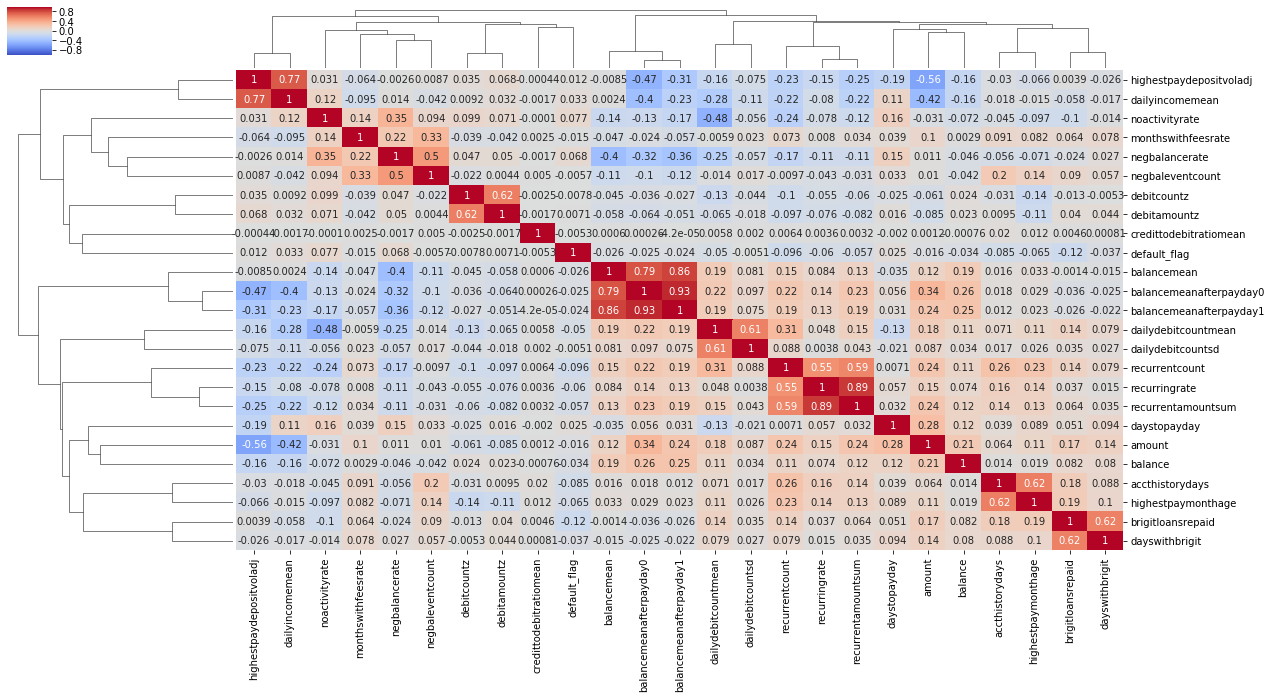

In [496]:
sns.clustermap(raw_df[numerical_columns].corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm',figsize=(20,10));

### Features with high correlation:
- recurringrate & recurrentamountsum
- balancemean, balancemeanafterpayday0, & balancemeanafterpayday1

#### Let's see if any of these features out perform in predicting a default

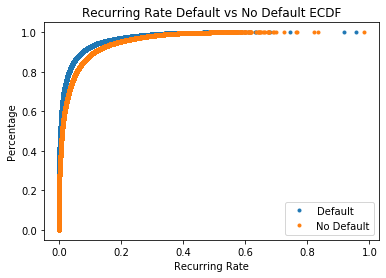

In [497]:
defaults = raw_df[raw_df['default_flag']==1]
no_defaults = raw_df[raw_df['default_flag']==0]

x,y = ecdf(defaults['recurringrate'])
xn,yn = ecdf(no_defaults['recurringrate'])
plt.plot(x,y,marker='.',ls='None',label='Default')
plt.plot(xn,yn,marker='.',ls='None',label='No Default')
plt.legend(loc="best");
plt.title('Recurring Rate Default vs No Default ECDF')
plt.ylabel('Percentage')
plt.xlabel('Recurring Rate');

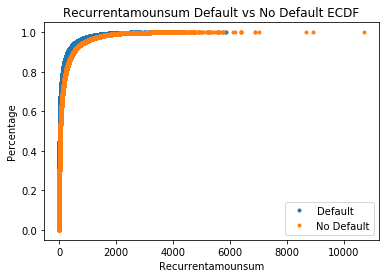

In [498]:
defaults = raw_df[raw_df['default_flag']==1]
no_defaults = raw_df[raw_df['default_flag']==0]

x,y = ecdf(defaults['recurrentamountsum'])
xn,yn = ecdf(no_defaults['recurrentamountsum'])
plt.plot(x,y,marker='.',ls='None',label='Default')
plt.plot(xn,yn,marker='.',ls='None',label='No Default')
plt.legend(loc="best");
plt.title('Recurrentamounsum Default vs No Default ECDF')
plt.ylabel('Percentage')
plt.xlabel('Recurrentamounsum');

### In the case of recurringrate & recurrentamountsum, it seems there is slightly more separation between recurring rate default rates vs recurrentamountsum. I'll drop recurrentamountsum to reduce multicollinearity


## Transform point

In [499]:
raw_df.drop(['recurrentamountsum'],axis=1,inplace=True)


### Lets check the balance means

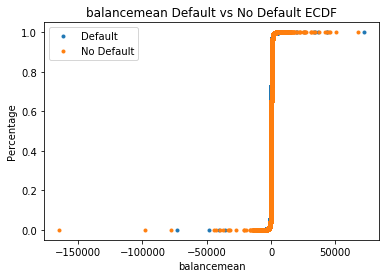

In [500]:
defaults = raw_df[raw_df['default_flag']==1]
no_defaults = raw_df[raw_df['default_flag']==0]

x,y = ecdf(defaults['balancemean'])
xn,yn = ecdf(no_defaults['balancemean'])
plt.plot(x,y,marker='.',ls='None',label='Default')
plt.plot(xn,yn,marker='.',ls='None',label='No Default')
plt.legend(loc="best");
plt.title('balancemean Default vs No Default ECDF')
plt.ylabel('Percentage')
plt.xlabel('balancemean');

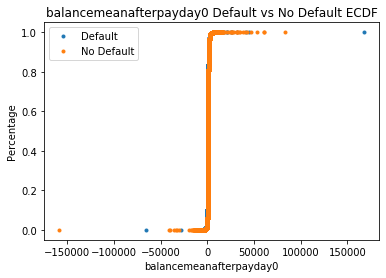

In [501]:
defaults = raw_df[raw_df['default_flag']==1]
no_defaults = raw_df[raw_df['default_flag']==0]

x,y = ecdf(defaults['balancemeanafterpayday0'])
xn,yn = ecdf(no_defaults['balancemeanafterpayday0'])
plt.plot(x,y,marker='.',ls='None',label='Default')
plt.plot(xn,yn,marker='.',ls='None',label='No Default')
plt.legend(loc="best");
plt.title('balancemeanafterpayday0 Default vs No Default ECDF')
plt.ylabel('Percentage')
plt.xlabel('balancemeanafterpayday0');

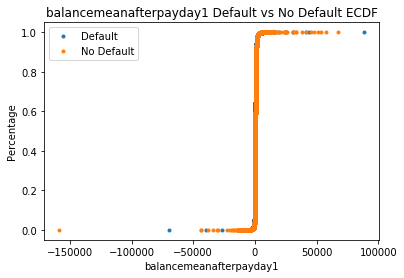

In [502]:
defaults = raw_df[raw_df['default_flag']==1]
no_defaults = raw_df[raw_df['default_flag']==0]

x,y = ecdf(defaults['balancemeanafterpayday1'])
xn,yn = ecdf(no_defaults['balancemeanafterpayday1'])
plt.plot(x,y,marker='.',ls='None',label='Default')
plt.plot(xn,yn,marker='.',ls='None',label='No Default')
plt.legend(loc="best");
plt.title('balancemeanafterpayday1 Default vs No Default ECDF')
plt.ylabel('Percentage')
plt.xlabel('balancemeanafterpayday1');

### In the case of their distributions, there seems to be no visual difference between any of the balance means between defaults and no defaults.

### I'll take the mean of the three to reduce collinearity.

In [503]:
raw_df['balancemeanCombined'] = raw_df[['balancemean','balancemeanafterpayday0','balancemeanafterpayday1']].mean(axis=1)
raw_df.drop(['balancemean','balancemeanafterpayday0','balancemeanafterpayday1'],axis=1,inplace=True)

## Finally, let's explore the relationship between the features and our target
### so far we've seen almost no difference in balance means between defaults and not defaulting while we did see separation in the recurring rate features. 

Number of charts: 19


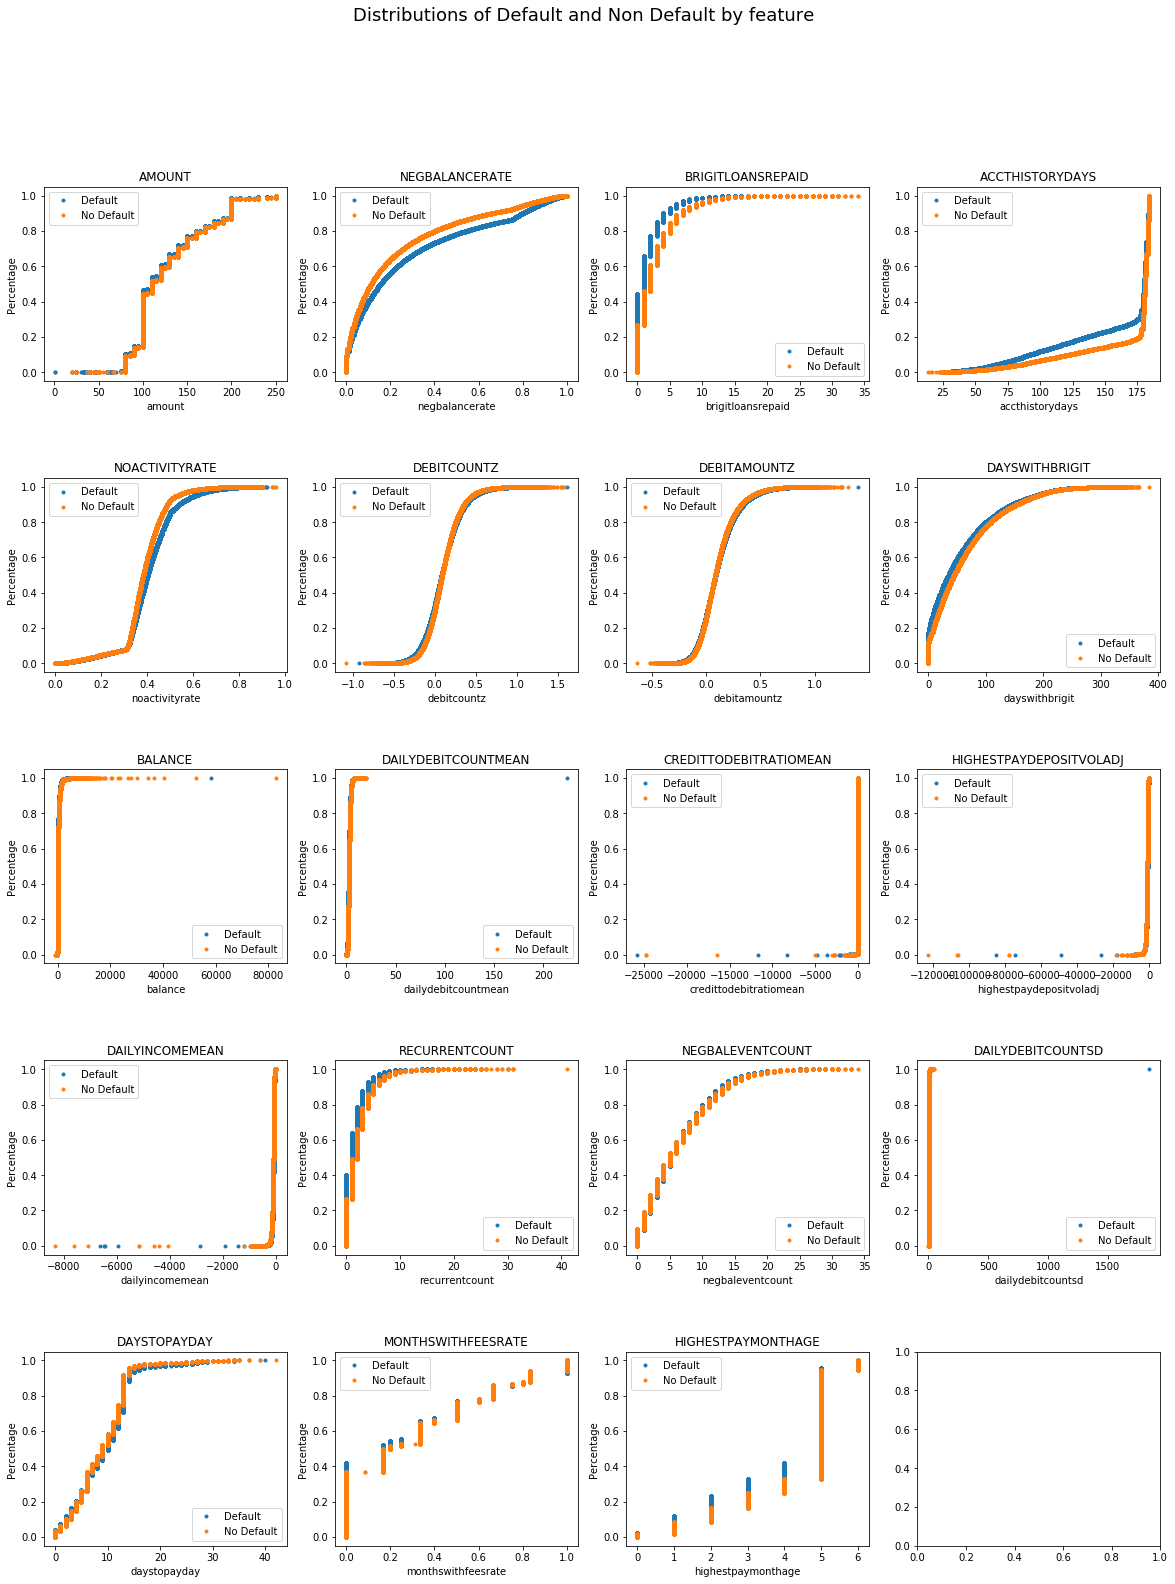

In [509]:
import copy
explore_columns = copy.deepcopy(numerical_columns)
explore_columns.remove('default_flag')
explore_columns.remove('balancemean')
explore_columns.remove('balancemeanafterpayday0')
explore_columns.remove('balancemeanafterpayday1')
explore_columns.remove('recurringrate')
explore_columns.remove('recurrentamountsum')


print(f'Number of charts: {len(explore_columns)}')

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,25))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Default and Non Default by feature',size=18)

for ax, feature in zip(axes.flatten(), explore_columns):
    x,y = ecdf(defaults[feature])
    xn,yn = ecdf(no_defaults[feature])
    ax.plot(x,y,marker='.',ls='None',label='Default')
    ax.plot(xn,yn,marker='.',ls='None',label='No Default')
    ax.legend(loc="best");
    ax.set_title(f'{feature} Default vs No Default ECDF')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(feature);
    ax.set(title=feature.upper())

### Here are the features with the largest separation:
- negbalancerate: More negative balances seems to relate to the odds of defaulting
- brigitloansrepaid: The more loans already paid = less default risk
- accthistorydays: The longer the account history, the odds of a default increases.
- noactivityrate: The less activity can mean more defaults
- dayswithbrigit: Users who are new to brigit are more likely to default than those with brigit over a longer period of time
- recurrentcount: Those with less recurrent debits have a higher risk of defaulting
- highestpaymonthage: Users who's pay is highest the further from underwriting have a risk of default
- monthswithfeesrate: the more months a user has months with overdraft fees the more likely they are to default

In [522]:
## There is an outlier in dailydebitcountmean. Let's see this user. and what teh distrubition looks like without this loan
raw_df.loc['83d63f49608dc9bc2ac1afd4b39219f7']

user_id                    5e3f174d6985b17c73d8d8b02bb484dc
amount                                                  200
signup_source                                       ANDROID
location_state                                           MA
negbalancerate                                    0.0405405
brigitloansrepaid                                         0
highestpayfrequency                                 MONTHLY
accthistorydays                                          73
noactivityrate                                     0.459459
recurringrate                                             0
debitcountz                                       -0.116602
debitamountz                                      -0.113179
dayswithbrigit                                           39
balance                                                 3.7
dailydebitcountmean                                 223.662
credittodebitratiomean                            -0.271915
highestpaydepositvoladj                 

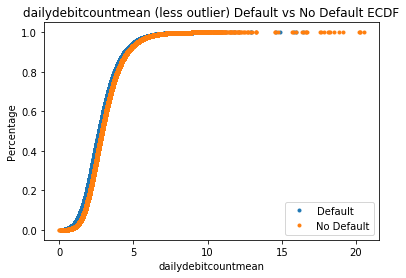

In [525]:
defaults = raw_df[raw_df['default_flag'] == 1]
ndefaults = raw_df[raw_df['default_flag'] == 0]

x,y = ecdf(defaults['dailydebitcountmean'].drop('83d63f49608dc9bc2ac1afd4b39219f7'))
xn,yn = ecdf(ndefaults['dailydebitcountmean'])
plt.plot(x,y,marker='.',ls='None',label='Default')
plt.plot(xn,yn,marker='.',ls='None',label='No Default')
plt.legend(loc="best");
plt.title('dailydebitcountmean (less outlier) Default vs No Default ECDF')
plt.ylabel('Percentage')
plt.xlabel('dailydebitcountmean');

In [535]:
zscore = lambda x: (x-x.mean())/x.std()
raw_df[raw_df['dailydebitcountmean'].transform(zscore).sort_values(ascending=False) < 15]

C:\Users\richard\.conda\envs\brigit\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,user_id,amount,signup_source,location_state,negbalancerate,brigitloansrepaid,highestpayfrequency,accthistorydays,noactivityrate,recurringrate,...,highestpaydepositvoladj,dailyincomemean,recurrentcount,negbaleventcount,dailydebitcountsd,daystopayday,monthswithfeesrate,highestpaymonthage,default_flag,balancemeanCombined
id,,,,,,,,,,,,,,,,,,,,,
b1c2c1027a80cf96612e94b17ca6cf97,871d568bad72ff8e9ef2bfe227bccac1,170.0,IOS,FL,0.977654,0,BIWEEKLY,182,0.726257,0.011213,...,-1097.669903,-107.530000,1,2,1.190873,12.0,0.666667,3,0,-489.035559
6f0fa11f0cd94e8c4b08fa60cf7a9784,f273f1ce0b770de2e4a4bc853c9c77e1,110.0,IOS,TX,0.280220,0,BIWEEKLY,183,0.494505,0.000000,...,-1018.000000,-73.000000,0,8,4.429320,9.0,0.000000,3,0,516.397285
8e19d4254653f2da889669d1b4f72214,b265ca31b3cba20036699653814d4abc,160.0,ANDROID,CA,0.021978,2,BIWEEKLY,183,0.313187,0.031242,...,-1746.861229,-139.278000,6,3,8.135877,13.0,0.500000,2,0,794.002912
5e7c6fe5992c0335c9ed67a9b78d2db5,2bce2b1907287fa7bebf562213e315b8,90.0,ANDROID,KY,0.716981,0,BIWEEKLY,105,0.481132,0.004398,...,-768.661226,-57.075000,1,8,4.204734,11.0,0.500000,2,0,111.643061
cf17ce55016ff72fe9c30286c502f46b,f2aefc7c5d07f790d59dadf8742eb32b,100.0,ANDROID,PA,0.899441,2,WEEKLY,182,0.530726,0.059451,...,-740.387624,-117.150000,2,7,1.943267,3.0,0.833333,4,0,-174.371473
4ac455a5cdfac8d925ce9a9ced31968f,fcc9887e309001e921a10150cb049ca3,100.0,ANDROID,CA,0.016484,1,WEEKLY,182,0.445055,0.000000,...,-508.953553,-75.891000,0,3,3.716405,4.0,0.000000,5,0,173.676758
45702bce70ed91d0298268387e944dee,80e61112847d0650c65d9c3ee717585f,120.0,IOS,MD,0.193182,0,BIWEEKLY,87,0.409091,0.000000,...,-1037.890363,-77.953000,0,9,5.442381,7.0,0.000000,2,0,447.378725
07f4fb6f0309d7466110546f64cffea4,508e081011c574de73b8c3a1cfefe8c4,120.0,IOS,CA,0.049451,4,BIWEEKLY,183,0.478022,0.025202,...,-902.043675,-68.573000,3,4,2.690499,13.0,0.000000,5,0,348.257839
c93d9a9fbfd332df65fbafd4e3d20753,65e30b32836836168c6db87f88a76ae4,110.0,ANDROID,OH,0.933702,11,BIWEEKLY,183,0.337017,0.016521,...,-1777.029163,-210.710000,3,4,4.029922,5.0,0.833333,5,0,-3618.285742


### These two are similar but we do see some separation between the two. I'll add this to the list of interesting features.

In [510]:
raw_df.drop(explore_columns,axis=1).drop(['recurringrate','balancemeanCombined','user_id'],axis=1).columns

Index(['signup_source', 'location_state', 'highestpayfrequency',
       'default_flag'],
      dtype='object')

In [511]:
category = 'signup_source'
category_default_rate = raw_df.reset_index().pivot_table('id',category,'default_flag',aggfunc='count')
n = category_default_rate.sum(axis=1)
category_default_rate = category_default_rate.transform(lambda x: x/category_default_rate.sum(axis=1))
category_default_rate['N'] = n
category_default_rate.sort_values('N',ascending=False)

default_flag,0,1,N
signup_source,,,
IOS,0.884857,0.115143,201558
ANDROID,0.874282,0.125718,86169
Unknown,0.901757,0.098243,9507
MOBILE,0.891856,0.108144,4494
WEB,0.879613,0.120387,1138


### Most users use IOS and have a slightly lower default rate than average. Android users account for a higher default rate.

### in our customer transformations, I'll transform these into numerical columns using pd.get_dummies.

In [512]:
category = 'location_state'
category_default_rate = raw_df.reset_index().pivot_table('id',category,'default_flag',aggfunc='count')
n = category_default_rate.sum(axis=1)
category_default_rate = category_default_rate.transform(lambda x: x/category_default_rate.sum(axis=1))
category_default_rate['N'] = n
category_default_rate.sort_values('N',ascending=False)

default_flag,0,1,N
location_state,,,
TX,0.886535,0.113465,61279
CA,0.896444,0.103556,56134
FL,0.873054,0.126946,18244
IL,0.878565,0.121435,18199
OH,0.866425,0.133575,17099
AZ,0.892665,0.107335,13919
GA,0.872223,0.127777,12154
NC,0.851166,0.148834,10589
NY,0.898039,0.101961,9994


### Users from FL, IL, and OH, because of their sample size, drive the default rate higher (because of their sample size).

### the question becomes, should we use the source state as a factor in deciding approvals? On one hand yes, if an area is in a depressed state, we may want to lend a little less there but we wouldn't want to reject users based purely on this factor. We'd want other features to prove they shouldn't be leant to either.

In [513]:
category = 'highestpayfrequency'
category_default_rate = raw_df.reset_index().pivot_table('id',category,'default_flag',aggfunc='count')
n = category_default_rate.sum(axis=1)
category_default_rate = category_default_rate.transform(lambda x: x/category_default_rate.sum(axis=1))
category_default_rate['N'] = n
category_default_rate.sort_values('N',ascending=False)

default_flag,0,1,N
highestpayfrequency,,,
BIWEEKLY,0.888818,0.111182,184220
WEEKLY,0.909486,0.090514,52025
SEMIMONTHLY,0.890406,0.109594,44601
MONTHLY,0.836731,0.163269,10449
Unknown,0.543279,0.456721,5892
IRREGULAR,0.790569,0.209431,4708
MONTHLY_WEEKDAY,0.859938,0.140062,971


In [514]:
### Advances where a users pay schedule is unknown has a much higher default rate than those who have intervaled pay frequencies. 

### interestingly enough, those with Monthly and irregular pay frequencies default more often as well.

### We'll add this to our custom transformers using pd.get_dummies

In [515]:
(raw_df['noactivityrate']*raw_df['accthistorydays'])

id
b1c2c1027a80cf96612e94b17ca6cf97    132.178771
6f0fa11f0cd94e8c4b08fa60cf7a9784     90.494505
8e19d4254653f2da889669d1b4f72214     57.313187
5e7c6fe5992c0335c9ed67a9b78d2db5     50.518868
cf17ce55016ff72fe9c30286c502f46b     96.592179
4ac455a5cdfac8d925ce9a9ced31968f     81.000000
45702bce70ed91d0298268387e944dee     35.590909
07f4fb6f0309d7466110546f64cffea4     87.478022
c93d9a9fbfd332df65fbafd4e3d20753     61.674033
56807fedef52e122f69fc6baba856429     73.403315
cf39773929c888edab81429341fa136b     58.670391
14508cded159d87f960c2c849300500b     75.240223
4f9999c1e41e0496b485779adae338b0     72.594444
edc9ec76e79ac159c9861f7bd9130d5b    107.177778
ead32efd2c021cd7cfdb0e9c419bc23f      8.087912
4a6668a197e77ecf806e5600a090a651     26.635135
be1c589a5ebf1b5b81f292d486c374a6     58.672222
30a3664798721be0817febbe4b6f5d33     47.644444
3ae37dc2bc4d56cf611fb8ef4fb39d19     35.193370
a6fe1cb95f7ddf96c99989615bb65fcd     39.607843
44a25902124cef1a59fbba8e6e0040e4     63.039106
c71cc4a480

In [516]:
raw_df['highestpaydepositvoladj']

id
b1c2c1027a80cf96612e94b17ca6cf97   -1097.669903
6f0fa11f0cd94e8c4b08fa60cf7a9784   -1018.000000
8e19d4254653f2da889669d1b4f72214   -1746.861229
5e7c6fe5992c0335c9ed67a9b78d2db5    -768.661226
cf17ce55016ff72fe9c30286c502f46b    -740.387624
4ac455a5cdfac8d925ce9a9ced31968f    -508.953553
45702bce70ed91d0298268387e944dee   -1037.890363
07f4fb6f0309d7466110546f64cffea4    -902.043675
c93d9a9fbfd332df65fbafd4e3d20753   -1777.029163
56807fedef52e122f69fc6baba856429    -685.075524
cf39773929c888edab81429341fa136b   -1115.513420
14508cded159d87f960c2c849300500b    -883.720860
4f9999c1e41e0496b485779adae338b0   -1341.366148
edc9ec76e79ac159c9861f7bd9130d5b    -822.860438
ead32efd2c021cd7cfdb0e9c419bc23f    -902.642455
4a6668a197e77ecf806e5600a090a651   -2359.527665
be1c589a5ebf1b5b81f292d486c374a6   -1276.954151
30a3664798721be0817febbe4b6f5d33    -645.168471
3ae37dc2bc4d56cf611fb8ef4fb39d19    -400.000000
a6fe1cb95f7ddf96c99989615bb65fcd   -1140.228456
44a25902124cef1a59fbba8e6e0040e4   -1

In [ ]:
raw_df['daily_recurring_debits'] = raw_df['negBalanceRate']/(raw_df['accthistorydays']/30.5)

In [ ]:
defaults = raw_df[raw_df['default_flag'] == 1]
ndefaults = raw_df[raw_df['default_flag'] == 0]

x,y = ecdf(defaults['daily_recurring_debits'])
xn,yn = ecdf(ndefaults['daily_recurring_debits'])
plt.plot(x,y,marker='.',ls='None',label='Default')
plt.plot(xn,yn,marker='.',ls='None',label='No Default')
plt.legend(loc="best");
plt.title('daily_recurring_debits Default vs No Default ECDF')
plt.ylabel('Percentage')
plt.xlabel('daily_recurring_debits');

In [ ]:
defaults = raw_df[raw_df['default_flag'] == 1]
ndefaults = raw_df[raw_df['default_flag'] == 0]

x,y = ecdf(defaults['recurrentcount'])
xn,yn = ecdf(ndefaults['recurrentcount'])
plt.plot(x,y,marker='.',ls='None',label='Default')
plt.plot(xn,yn,marker='.',ls='None',label='No Default')
plt.legend(loc="best");
plt.title('recurrentcount Default vs No Default ECDF')
plt.ylabel('Percentage')
plt.xlabel('recurrentcount');